#### *This analysis will focus on understanding factors affecting car prices, visualizing relationships, and recommending the top 5 cars among the preferred options given by the user*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime
current_datetime = datetime.now()
current_year = current_datetime.year

In [3]:
df = pd.read_csv('car_prediction_dataset.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
print("Total cars available in the original dataset are: ", df.shape[0])

Total cars available in the original dataset are:  8128


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [7]:
# df.dropna(inplace=True)
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [8]:
dups = int(df.duplicated().sum())
print(f"There are {dups} duplicates in your data.")

There are 1202 duplicates in your data.


In [9]:
most_cars = df['name'].value_counts().nlargest(3)
print("The top 3 cars with the highest availability are:\n", most_cars)

The top 3 cars with the highest availability are:
 name
Maruti Swift Dzire VDI    129
Maruti Alto 800 LXI        82
Maruti Alto LXi            71
Name: count, dtype: int64


### *HANDLING MISSING VALUES*

In [10]:
# print(df['max_power'].unique()) 
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [11]:
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median())
df['engine'] = df['engine'].fillna(df['engine'].mean()).round(2)
df['max_power'] = df['max_power'].fillna(df['max_power'].mean()).round(2)

In [12]:
max_age = df['year'].min()
print("The oldest car is: ")
df[df['year'] == max_age]

The oldest car is: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
316,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,Third Owner,19.3,1458.63,91.52,5.0


In [13]:
max_price = df['selling_price'].max()

print("The most expensive car is: ")
df[df['selling_price'] == max_price]

The most expensive car is: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0


### *plotting selling price vs year of all the cars*

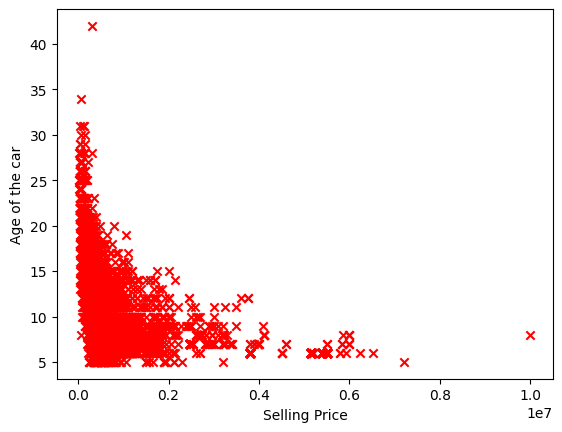

In [14]:
x = df['selling_price']
df['y'] = current_year - df['year']

plt.scatter(x,df['y'], marker='x', c='r')
plt.xlabel('Selling Price')
plt.ylabel('Age of the car')
# sns.scatterplot(x='selling_price',y='year', data=df, marker='x')
plt.show()

###### df[df['y'] > 40]

In [15]:
df.drop('y', axis=1, inplace=True)

### *Conditions given by the user*

In [16]:
# I want to buy a car which follows certain conditions:
# 1) The car is under the budget (<400000).
# 2) The car should be limited to a maximum of two owners.
# 3) Car has a minimum life of n years.


In [17]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [18]:
total_cars = df.shape[0]
total_cars

8128

In [19]:
# df[df['name'].str.split().str[0] == 'Hyundai i10']

In [20]:
## car_name, car_year, car_price, car_km, car_fuel, car_trans, car_owner, car_mileage, car_engine, car_power, car_seats

add_car = input("Do you want to add any car? Yes or No.\n").capitalize()
if add_car == 'Yes':
    cars_no = int(input("How many cars you want to add?\n"))
    for i in range(cars_no):
        car_name = input("Enter the car's name: ").capitalize()
        car_year = int(input("Enter the car's year of registration: "))
        car_price = int(input("Enter the car's price: "))
        car_km = int(input("Enter the distance covered by the car in km: "))
        car_fuel = input("Enter the fuel type: ").capitalize()
        car_trans = input("Enter the transmission type: ").capitalize()
        car_owner = input("Enter the subsequent owner: ").capitalize()
        car_mileage = float(input("Enter the mileage of your car: "))
        car_engine = float(input("Enter the CC of the engine: "))
        car_power = float(input("Enter the max power of your car: "))
        car_seats = int(input("Enter the seating capacity of your car: "))
        
        df.loc[total_cars] = [car_name, car_year, car_price, car_km, car_fuel, 'Individual', car_trans, car_owner, car_mileage, car_engine, car_power, car_seats]
        total_cars += 1
        df.tail()
# df.loc[8128] = 'hello'
total_cars


Do you want to add any car? Yes or No.
 NO


8128

In [21]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


## *REMOVING DUPLICATES*

In [22]:
df.drop_duplicates(inplace=True)
# shape2 = df.shape[0]
print(f"There were {dups} duplicates in your data which have been successfully removed.")

There were 1202 duplicates in your data which have been successfully removed.


### *ADDING COMPANY COLUMN*

In [23]:
df['Company'] = df['name'].str.split().str[0]

In [24]:
df = df.reindex(columns=['Company', 'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'])

In [25]:
df.head()

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### *Taking user input*

In [26]:
#user input

min_budget = int(input("Enter the min budget: "))
max_budget = int(input("Enter the max budget: "))

life = int(input("Enter the minimum life span required for the car: "))
fuel_type = input("Enter the fuel type, Diesel, Petrol or CNG: ")
transmission_type = input("Enter the transmission type: ")


Enter the min budget:  710000
Enter the max budget:  720000
Enter the minimum life span required for the car:  10
Enter the fuel type, Diesel, Petrol or CNG:  PETROL
Enter the transmission type:  MANUAL


### *Filtering budget*

In [27]:
#budget section

df1 = df[(df['selling_price'] > min_budget) & (df['selling_price'] < max_budget)].copy()


In [28]:
df1['Age'] = current_year - df1['year']
df1.reset_index(drop=True)

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Age
0,Hyundai,Hyundai i20 Asta 1.4 CRDi,2015,715000,50000,Diesel,Individual,Manual,First Owner,22.54,1396.0,88.73,5.0,10
1,Mahindra,Mahindra Scorpio S4 Plus 4WD,2015,715000,70000,Diesel,Individual,Manual,First Owner,15.40,2179.0,120.00,7.0,10
2,Maruti,Maruti Swift Dzire VDI,2017,711000,35000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,5.0,8
3,Maruti,Maruti Ertiga SHVS ZDI Plus,2016,711000,120000,Diesel,Individual,Manual,First Owner,24.52,1248.0,88.50,7.0,9
4,Hyundai,Hyundai i20 Active 1.4 SX with AVN,2017,715000,60000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.73,5.0,8
5,Maruti,Maruti Vitara Brezza LDi Option,2017,711000,53000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,5.0,8
6,Maruti,Maruti Baleno Alpha 1.2,2019,711000,5000,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.10,5.0,6
7,Maruti,Maruti Ciaz ZDi Plus SHVS,2016,715000,70000,Diesel,Individual,Manual,Second Owner,28.09,1248.0,88.50,5.0,9


### *Evaluate Age of cars and filtering by life span*

In [29]:

# life_span = []
# for i in range(df1.shape[0]):
#     n = current_year - df1.loc[i, 'year']
#     life_span.append(int(n))

# df1.loc[:,'Age'] = life_span 
# df1 = df1[df1['Age'] <= life].copy()


### *Filtering fuel type*

In [30]:
##### fuel section

fuel_type = fuel_type.capitalize()
df1 = df1[df1['fuel'] == fuel_type]



### *Transmission section*

In [37]:
transmission_type = transmission_type.capitalize()
df1 = df1[df1['transmission'] == transmission_type].reset_index(drop=True)

### *Displaying the available cars*

In [39]:
available = df1.shape[0]
if available == 0:
    print("There are no cars available.")
elif available == 1:
    print(f"There is only 1 car available which is -> {df1.loc[0,'name']}")
else: 
    print(f"There are {available} cars available:\n{df1.iloc[:,0]}")

 

There is only 1 car available which is -> Maruti Baleno Alpha 1.2


### *calculating price to mileage ratio*

In [40]:
ratio = (df1['selling_price']) / (df1['mileage(km/ltr/kg)'])

df1['price to mileage ratio'] = ratio.round(2)



df2 = df1.sort_values('price to mileage ratio').head(10).copy()

df2.reset_index(drop=True)


,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Age,price to mileage ratio
0,Maruti,Maruti Baleno Alpha 1.2,2019,711000,5000,Petrol,Individual,Manual,First Owner,21.4,1197.0,83.1,5.0,6,33224.3


In [41]:
print("The leading cars having the minimum Price:Mileage ratio and fewest km driven available within your preferred options are: ")
df2 = df2.nsmallest(5, 'km_driven')
df2.reset_index(drop=True)

The leading cars having the minimum Price:Mileage ratio and fewest km driven available within your preferred options are: 


,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Age,price to mileage ratio
0,Maruti,Maruti Baleno Alpha 1.2,2019,711000,5000,Petrol,Individual,Manual,First Owner,21.4,1197.0,83.1,5.0,6,33224.3


### *plotting selling price vs p-m ratio of the suggested top cars*

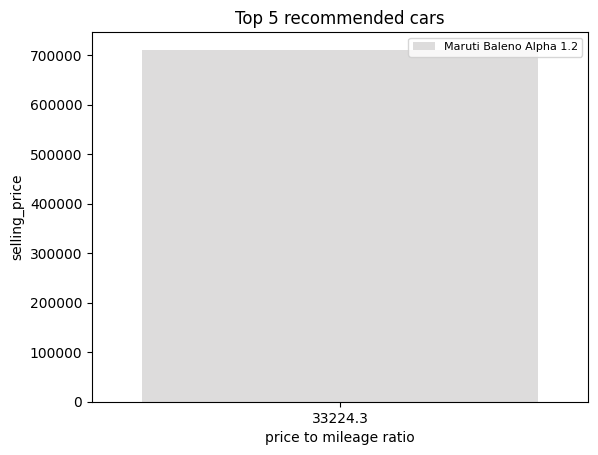

In [35]:

sns.barplot(x='price to mileage ratio', y='selling_price', data=df2,hue='name', palette='coolwarm')
plt.title("Top 5 recommended cars")
plt.legend(fontsize=8)
plt.show()
